In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


**I have successfully mounted my drive on colab. Now I can import my data here.**

In [10]:
yearlyDF = pd.read_csv('/content/drive/MyDrive/Datasets/yearly_deaths_by_clinic.csv')
yearlyDF

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [11]:
yearlyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


**We want to group the data into clinic so we can determine which of the two record the highest death in the year.**

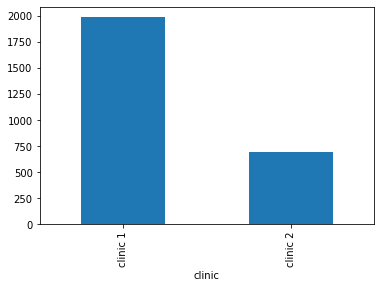

In [12]:
groupUsingClinic = yearlyDF.groupby('clinic') 
groupUsingClinic['deaths'].sum().plot(kind = 'bar')


**The above results shows us the number of births and deaths in 2 clinics from the year 1841 till 1846. It's obvious that the number of deaths in clinic 1 is higher than that of clinic 2**

In [13]:
#To make the analysis easier, we can calculate the proportion of deaths.
yearlyDF['Proportion_of_Death'] = yearlyDF['deaths'] / yearlyDF['births']
yearlyDF

,year,births,deaths,clinic,Proportion_of_Death
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004


In [15]:
#yearlyDF.drop(['Proportion of Death'], inplace = True, axis = 1)
#yearlyDF

In [16]:
#Separate the dataset into 2 datasets, one for each clinic
Clinic1 = yearlyDF[yearlyDF['clinic'] == 'clinic 1']
Clinic2 = yearlyDF[yearlyDF['clinic'] == 'clinic 2']
Clinic1



,year,births,deaths,clinic,Proportion_of_Death
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


In [17]:
Clinic2

,year,births,deaths,clinic,Proportion_of_Death
6,1841,2442,86,clinic 2,0.035217
7,1842,2659,202,clinic 2,0.075968
8,1843,2739,164,clinic 2,0.059876
9,1844,2956,68,clinic 2,0.023004
10,1845,3241,66,clinic 2,0.020364
11,1846,3754,105,clinic 2,0.027970


**Visualize the Number of deaths every year in clinic 1**

Text(0, 0.5, 'Number of death')

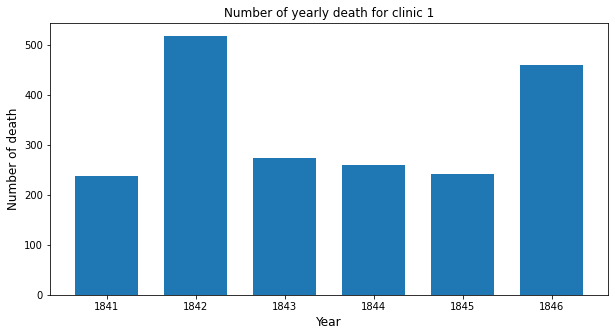

In [18]:
Fig, ax = plt.subplots(figsize = (10,5))
plt.bar(Clinic1.year, Clinic1.deaths, width = 0.7)
plt.title('Number of yearly death for clinic 1', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of death', fontsize = 12)

**Visualize the Number of deaths every year in clinic 1**

Text(0, 0.5, 'Number of deaths')

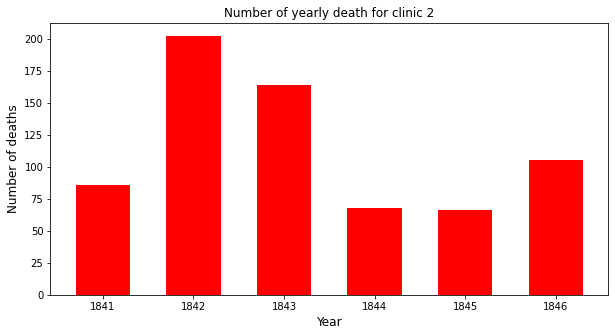

In [19]:
Fig,ax = plt.subplots(figsize = (10,5))
plt.bar(Clinic2.year, Clinic2.deaths, color = 'red' , width = 0.6)
plt.title('Number of yearly death for clinic 2', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of deaths', fontsize = 12)



**It seems that 1842 was a pretty hectic year in both clinic 1 & 2 where the numbers of deaths were 518 and 202 respective**l

**Plot the proportion of deaths in clinic 1 and 2**

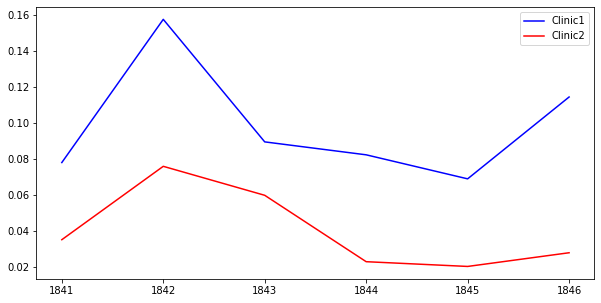

In [20]:
Fg,ax = plt.subplots(figsize = (10,5))
plt.plot(Clinic1['year'], Clinic1['Proportion_of_Death'], label= 'Clinic1', color = 'blue')
plt.plot(Clinic2['year'], Clinic2['Proportion_of_Death'], label = 'Clinic2', color = 'red')
plt.legend()
#label= 'Clinic1' color = 'blue'

**By looking further into why this happened, Dr Semmelweis realized that many medical students worked at clinic 1 who also as a part of their study, spend a lot of time in the autopsy room. So, he realized that dealing with corpses spread bacteria that would be transferred to the women giving birth, infecting them with the deadly childbed fever, which was the main reason for the high mortality rates.**

## **WORKING WITH MONTHLY DATA**

In [22]:
#Reading the monthly dataset
monthlyDF = pd.read_csv('/content/drive/MyDrive/Datasets/monthly_deaths.csv')
monthlyDF.head(10)

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
5,1841-06-01,200,10
6,1841-07-01,190,16
7,1841-08-01,222,3
8,1841-09-01,213,4
9,1841-10-01,236,26


In [24]:
monthlyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [25]:
#chaning the 'date' column datatype into datetime
monthlyDF['date'] = pd.to_datetime(monthlyDF['date'])

In [26]:
monthlyDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [28]:
#calculate the proportion of deaths per month
monthlyDF['proportion_of_Death'] = monthlyDF['deaths'] / monthlyDF['births']
monthlyDF.head(10)

,date,births,deaths,proportion_of_Death
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
5,1841-06-01,200,10,0.050000
6,1841-07-01,190,16,0.084211
7,1841-08-01,222,3,0.013514
8,1841-09-01,213,4,0.018779
9,1841-10-01,236,26,0.110169


In [48]:
len(monthlyDF)
from IPython.display import display


,date,births,deaths,proportion_of_Death
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843
...,...,...,...,...
93,1848-11-01,310,9,0.029032
94,1848-12-01,373,5,0.013405
95,1849-01-01,403,9,0.022333
96,1849-02-01,389,12,0.030848


**Dr Semmelweis ordered the doctors to wash their hands and made it obligatory in the summer of 1847 to see if that will affect the number of deaths, and since we have the monthly data now, we can trace the number of deaths before and after the handwashing started**

In [50]:
#Label the date at which handwashing started to 'startHW'
startHW = pd.to_datetime('1847-06-01')

#split monthly into before and after handwashing
beforeHW = monthlyDF[monthlyDF['date'] < startHW]
afterHW = monthlyDF[monthlyDF['date'] >= startHW]
print(beforeHW)

         date  births  deaths  proportion_of_Death
0  1841-01-01     254      37             0.145669
1  1841-02-01     239      18             0.075314
2  1841-03-01     277      12             0.043321
3  1841-04-01     255       4             0.015686
4  1841-05-01     255       2             0.007843
..        ...     ...     ...                  ...
71 1847-01-01     311      10             0.032154
72 1847-02-01     312       6             0.019231
73 1847-03-01     305      11             0.036066
74 1847-04-01     312      57             0.182692
75 1847-05-01     294      36             0.122449

[76 rows x 4 columns]


Text(0, 0.5, 'proportion of deaths')

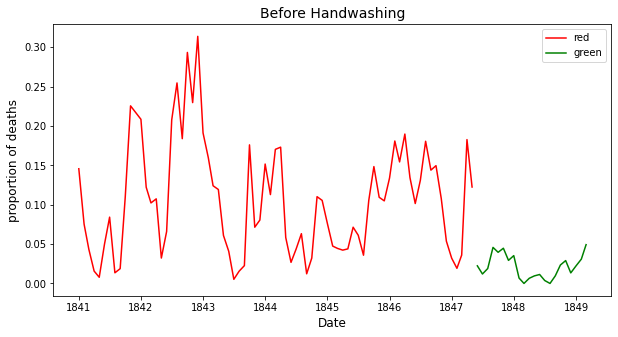

In [54]:
#Before Handwashing AND after hand washing
Fig,ax = plt.subplots(figsize = (10,5))
plt.plot(beforeHW['date'], beforeHW['proportion_of_Death'], color = 'red', label = 'red')
plt.plot(afterHW['date'], afterHW['proportion_of_Death'], color = 'green', label = 'green')
plt.legend()
plt.title('Before Handwashing', fontsize = 14)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('proportion of deaths', fontsize = 12)



 **The difference is pretty clear! the proportion of deaths dramatically decreased after handwashing was made obligatory.**

In [62]:
#Lets see how much exactly washing hand descreased the proportion of deaths on an average using bar chat
Pbeforehandwash = beforeHW['proportion_of_Death'].mean()
display(Pbeforehandwash)

0.10504998260908789

In [63]:
Pafterhandwash = afterHW['proportion_of_Death'].mean()
display(Pafterhandwash)

0.021093375097254535

In [69]:
diff = Pafterhandwash - Pbeforehandwash
display(diff)

-0.08395660751183336

**The minus sign indicate that there is a decrease. So handwashing decreased the proportion of deaths from 10% to 2% i.e, by approximately 8%.**